First step is to import required libraries and utilities.

In [1]:
# -*- coding: utf-8 -*-
import json # For reading COCO annotations file
import cv2   # For image loading and manipulation
import numpy as np  # For numerical and array operations

from matplotlib import pyplot as plt   # For visualizing images

import os  # For file system access
from ultralytics import YOLO  # Model to train

### STEP I: Visualize Images

First, I set the path to the annotations file. Then I load the file using __json__ library, after which I specifically extract the specific information for the images and their respective annotations.

In [2]:
def return_split_files(split, dataset_folder = "segmentation_dataset", images = True):
    ftype = "images" if images else "labels"
    
    image_base_dir = f"../datasets/{dataset_folder}/{ftype}/{split}"
    image_paths = [os.path.join(image_base_dir, f) for f in os.listdir(image_base_dir)]
    return image_paths

TEST_IMAGE_PATHS = return_split_files("test", "stenosis_dataset", True)
TEST_LABEL_PATHS = return_split_files("test", "stenosis_dataset", False)

### STEP II: Model Training

Now, I train the model. To do this, I need to ensure that the results are repproducible. I also need a configuration file telling the model where to find the data, and what labels to expect in the data.

In [3]:
import torch

In [4]:
# Ensure reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [5]:
# Instantiate model
model = YOLO('yolov8s.pt')

In [6]:
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [7]:
# Load configuration file
CONFIG_FILE = os.path.join("..", "config", "stenosis_config.yaml")

In [8]:
# Set image size for training
ORIGINAL_IMGSZ = (694, 542)
# IMGSZ = 672
IMGSZ = 640

In [9]:
# Folder for storing artefacts
folder = "stenosis_yolov8s"

In [10]:
# Train model
results = model.train(
    data = CONFIG_FILE,
    visualize = True,
    epochs = 150,
    imgsz = IMGSZ,
    optimizer = "auto",
    lr0 = 1e-3,
    batch = -1,
    dropout = .6,
    pretrained = True,
    save = True,
    cos_lr = True,
    deterministic = True,
    name = folder
)

Ultralytics YOLOv8.2.0 🚀 Python-3.9.18 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=../config/stenosis_config.yaml, epochs=150, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=stenosis_yolov8s, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.6, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=True, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

/home/harkhymadhe/miniforge3/envs/mri/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1708025831482/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=640
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU) 8.00G total, 0.26G reserved, 0.13G allocated, 7.62G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    11137148       28.65         0.491         33.22         99.08        (1, 3, 640, 640)                    list
    11137148       57.31         0.694         21.66          53.7        (2, 3, 640, 640)                    list
    11137148       114.6         1.206         27.94         49.15        (4, 3, 640, 640)                    list
    11137148       229.2         1.988         40.49          66.4        (8, 3, 640, 640)                    list
    11137148       458.5         3.567         63.23         77.44       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 20 for CUDA:0 4.79G/8.00G (60%) ✅


train: Scanning /mnt/c/Users/Harkhymadhe/Desktop/source/export_3/SpineMRI/datasets/stenosis_dataset/labels/train.cache... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]
val: Scanning /mnt/c/Users/Harkhymadhe/Desktop/source/export_3/SpineMRI/datasets/stenosis_dataset/labels/val.cache... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]


Plotting labels to runs/detect/stenosis_yolov8s/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/stenosis_yolov8s
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      5.05G      5.781      28.11      3.557         20        640: 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         35        239          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      5.08G      4.535      21.31      2.664          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         35        239          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      5.04G      4.502      26.13      2.612         22        640: 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         35        239          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      5.18G      4.573      10.33      2.203         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         35        239      0.769     0.0974     0.0184    0.00426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      5.16G      2.476      4.916      1.026          0        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         35        239     0.0316      0.242     0.0367     0.0119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      5.15G      2.905      3.634      1.196          4        640: 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         35        239     0.0229      0.522     0.0392      0.013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      5.17G          2      3.788     0.8374          0        640: 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         35        239      0.332      0.148     0.0529     0.0138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      5.16G      2.536       2.63      1.124          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         35        239     0.0256      0.431     0.0295     0.0122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      5.16G      2.582      2.621       1.18          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         35        239     0.0321     0.0935     0.0408     0.0169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      5.17G      2.469      2.172     0.9891         24        640: 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         35        239     0.0569      0.175     0.0731     0.0271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      5.17G      2.399      2.086      1.046         19        640: 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         35        239     0.0735      0.227     0.0564     0.0213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      5.19G      2.325      1.953          1         20        640: 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         35        239     0.0945      0.195     0.0584     0.0199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      5.18G      2.497      2.238       1.14          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         35        239      0.173      0.283      0.181     0.0547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      5.19G      2.388      2.005      1.034         18        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         35        239      0.227       0.32      0.249     0.0846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      5.16G      2.291      1.773      1.033         14        640: 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         35        239      0.219      0.216      0.195     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      5.18G      2.065       1.72      1.019          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         35        239      0.478       0.24      0.202     0.0758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      5.16G      2.285      1.844      1.062         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         35        239      0.463      0.411       0.22     0.0759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      5.18G      2.218      1.827      1.043          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         35        239      0.534      0.281      0.222     0.0788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      5.18G      2.274      1.775      1.026         19        640: 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         35        239      0.436      0.405      0.194     0.0686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150       5.2G       2.18      1.774     0.9628         27        640: 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         35        239      0.458      0.293      0.142     0.0461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      5.22G      2.269      1.715      0.974         16        640: 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         35        239      0.498      0.204      0.182      0.058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      5.15G      2.069      1.632      1.024         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         35        239      0.465      0.267       0.22     0.0769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150       5.2G      2.053      1.644     0.9985          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         35        239      0.447      0.326      0.241     0.0734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      5.19G      1.854      1.447     0.9728          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         35        239       0.26      0.462      0.257      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      5.15G      2.049      1.511      1.035         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         35        239      0.175      0.254       0.12     0.0421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      5.19G      2.028      1.594     0.9349         16        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         35        239      0.457      0.406      0.185     0.0662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      5.21G      2.049      1.604     0.9581         13        640: 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         35        239      0.501      0.356      0.226     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      5.15G      2.017      1.432     0.9998          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         35        239      0.484       0.27      0.162       0.07



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      5.17G      2.174      1.588     0.9622         17        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         35        239      0.423      0.176      0.121     0.0521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      5.19G      2.125       1.76      1.133          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         35        239     0.0219      0.252     0.0336     0.0126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      5.14G      1.822       1.52     0.9287          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         35        239     0.0175      0.191     0.0302    0.00889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150       5.2G      1.911       1.51     0.9754          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         35        239      0.573     0.0522     0.0219     0.0059



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      5.18G      1.971      1.547          1         10        640: 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         35        239       0.48      0.142       0.12      0.041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      5.15G      2.072       1.62     0.9485         21        640: 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         35        239      0.489      0.169      0.154     0.0563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      5.15G      1.981      1.477      1.002          8        640: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         35        239      0.479       0.22       0.17     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      5.21G      1.519      1.405     0.7215          0        640: 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         35        239      0.467      0.318      0.245     0.0832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      5.16G      1.912      1.398     0.9397          8        640: 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         35        239      0.448      0.304      0.213     0.0751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      5.22G      1.918      1.599      1.002          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         35        239      0.467      0.273      0.218     0.0766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      5.18G       1.95      1.443     0.9526         22        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         35        239      0.478      0.329      0.264     0.0855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      5.18G      1.793      1.403     0.9282         12        640: 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         35        239      0.511      0.329      0.236     0.0813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      5.22G      1.759      1.397     0.9468          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         35        239      0.513      0.389      0.312      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      5.18G      1.771      1.326     0.9314         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         35        239      0.544      0.383      0.305      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      5.15G      1.843      1.289      0.946          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         35        239      0.512      0.381      0.275     0.0928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      5.19G      1.861       1.27     0.9484         16        640: 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         35        239      0.477       0.39      0.257     0.0924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      5.19G      1.914      1.358     0.9448         24        640: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         35        239      0.514      0.332      0.257        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      5.13G      1.767       1.72     0.9375          1        640: 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         35        239       0.54      0.297      0.241     0.0921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      5.18G      1.966      1.691      0.974          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         35        239      0.494      0.315      0.221     0.0805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      5.18G      1.717      1.195     0.8981          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         35        239      0.496      0.398        0.3      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      5.15G      1.969      1.349     0.9086         25        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         35        239      0.512       0.41      0.338      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      5.18G      1.333      1.192     0.7087          0        640: 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         35        239      0.529      0.435      0.363      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      5.18G      1.813       1.31     0.9175         15        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         35        239      0.607      0.332      0.345      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      5.18G      1.795      1.307     0.8991         20        640: 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         35        239      0.545      0.416      0.368      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      5.18G      1.842      1.203     0.9272         13        640: 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         35        239      0.536      0.432      0.378      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150       5.2G      1.704      1.298     0.9282          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         35        239      0.593      0.469      0.411      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      5.17G      1.292      1.257     0.6982          0        640: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         35        239      0.801      0.296      0.388      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      5.19G      1.771      1.237      0.901          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         35        239      0.807      0.291      0.355      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      5.19G      1.825      1.402      1.002          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         35        239      0.533      0.413      0.375      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      5.16G      1.703      1.115     0.9081         24        640: 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         35        239      0.587      0.425      0.423      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      5.19G      1.619      1.128     0.8934          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         35        239      0.641      0.372      0.387      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150       5.2G      1.649      1.165     0.8808         21        640: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         35        239       0.78      0.286       0.35      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150       5.2G      1.689      1.086     0.8881         26        640: 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         35        239       0.78      0.284      0.343      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      5.19G      1.628      1.051     0.8786         17        640: 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         35        239      0.752      0.275       0.32     0.0999



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      5.21G      1.634      1.111     0.9014         11        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         35        239       0.79      0.279      0.345      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      5.15G       1.61      1.228     0.9114          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         35        239      0.764      0.288      0.349       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      5.21G      1.703      1.128     0.8936         26        640: 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         35        239      0.775      0.292      0.356      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      5.18G      1.414      1.017     0.8964          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         35        239      0.565      0.385      0.372      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      5.15G      1.634       1.26     0.9219          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         35        239      0.618      0.402      0.417      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      5.21G      1.151     0.8927     0.6664          0        640: 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         35        239       0.86      0.274      0.432      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      5.19G      1.585      1.008     0.8948          5        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         35        239      0.831      0.278      0.413      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      5.16G      1.682       1.07     0.9079         23        640: 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         35        239      0.811      0.302      0.405      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150       5.2G      1.736        1.1     0.8969         13        640: 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         35        239      0.787      0.314       0.41       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      5.21G      1.732      1.242     0.9033         17        640: 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         35        239      0.662      0.424      0.424      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      5.13G      1.731      1.293     0.9564          3        640: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         35        239      0.699      0.402      0.388      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      5.17G      1.584      1.043     0.9166          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         35        239      0.672      0.395      0.374      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      5.19G      1.482      0.995     0.9051          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         35        239       0.61      0.361      0.354      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      5.13G      1.085       1.01     0.6624          0        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         35        239      0.579      0.382      0.328      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      5.17G      1.516      1.016     0.9164          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         35        239      0.788      0.299      0.332      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150       5.2G      1.594      1.047     0.8787         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         35        239      0.784      0.317      0.376      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      5.17G      1.509     0.9646     0.8763          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         35        239      0.781      0.314      0.366      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      5.19G      1.453     0.9962     0.8761         14        640: 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         35        239       0.79      0.305       0.37       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      5.19G      1.653      1.017     0.8466          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         35        239      0.797      0.268      0.368      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      5.18G      1.539      1.171     0.9431          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         35        239      0.278      0.374      0.371      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      5.16G      1.091     0.9709     0.6594          0        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         35        239      0.296      0.409      0.376      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      5.18G      1.584     0.9523     0.8779         13        640: 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         35        239      0.371      0.428      0.366       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      5.16G      1.507     0.9956     0.8988         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         35        239      0.636      0.412      0.369      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      5.18G      1.519      1.018     0.9212          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         35        239      0.651      0.422      0.374      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      5.21G       1.07     0.9142     0.6604          0        640: 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         35        239      0.609      0.392      0.349      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      5.17G      1.497     0.9649     0.8668         23        640: 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         35        239      0.595      0.456      0.391       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150       5.2G      1.321     0.8598     0.8484          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         35        239      0.336      0.471      0.394      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      5.18G      1.367      0.912     0.8713          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         35        239       0.37      0.455       0.41      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      5.16G      1.479     0.8651     0.8653          9        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         35        239       0.65      0.439      0.418       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      5.21G      1.714      1.045     0.8983          8        640: 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         35        239      0.686      0.419      0.407      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      5.19G      1.415     0.9136     0.9003          9        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         35        239      0.745      0.405      0.449      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      5.15G      1.325     0.8821     0.8561         14        640: 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         35        239      0.687       0.43      0.448      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      5.18G      1.383     0.8447     0.8565         18        640: 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         35        239      0.428      0.414      0.437       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      5.15G      1.339     0.8078     0.8455         12        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         35        239      0.387      0.421      0.412      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      5.15G      1.494      1.033     0.9193          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         35        239        0.4      0.474      0.411      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      5.16G      1.441     0.9504     0.8905         22        640: 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         35        239      0.637      0.441      0.412      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      5.17G      1.281     0.8109      0.862          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         35        239      0.644      0.447      0.405      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      5.18G      1.327     0.8242      0.873          8        640: 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         35        239      0.656       0.43      0.418      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      5.21G      1.296     0.8176     0.8361         27        640: 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         35        239      0.651      0.434      0.423      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      5.19G      1.364     0.7863      0.854         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         35        239      0.673      0.417      0.439       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      5.16G      1.296     0.8625      0.841         10        640: 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         35        239      0.687      0.422      0.441      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      5.18G      1.344     0.8651     0.8773         12        640: 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         35        239      0.699      0.425      0.443      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      5.17G       1.24     0.8268     0.8395          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         35        239      0.692      0.427       0.45      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      5.16G      1.214     0.7483     0.8468          5        640: 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         35        239      0.694      0.426      0.444      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150       5.2G      1.403     0.9003     0.8328         25        640: 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         35        239      0.714      0.425      0.447       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      5.18G     0.9509     0.8692     0.6409          0        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         35        239      0.696      0.412      0.445      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      5.17G      1.323     0.8987     0.8405         22        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         35        239      0.705      0.421      0.442      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      5.19G      1.375     0.8857     0.8552         23        640: 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         35        239      0.698      0.413      0.438      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      5.17G      1.167     0.8624     0.8521          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         35        239      0.717       0.43      0.443      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      5.19G      1.215      0.802     0.8733         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         35        239      0.698        0.4      0.441      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      5.18G     0.9311     0.6777     0.6445          0        640: 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         35        239      0.696      0.413      0.441       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      5.16G      1.202     0.7457     0.8499          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         35        239      0.699      0.415      0.422      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      5.11G      1.295     0.8281     0.8567          5        640: 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         35        239      0.707      0.427      0.423       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      5.15G      1.146      0.778     0.8475          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         35        239      0.694      0.418      0.417       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      5.22G      1.452     0.9414     0.9011          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         35        239      0.696      0.401      0.428      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      5.12G      1.397     0.9134     0.8228         13        640: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         35        239       0.69      0.391      0.428      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      5.18G       1.28       0.85     0.8932          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         35        239      0.415      0.395      0.424      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      5.22G      1.272     0.8226     0.8254         20        640: 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         35        239       0.45      0.405      0.424      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      5.17G      1.301      0.891     0.8504         23        640: 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         35        239       0.47      0.405      0.424       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150       5.2G      1.186     0.7711     0.8924          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         35        239       0.48      0.399      0.428      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      5.18G      1.385      0.922     0.8566          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         35        239      0.462        0.4      0.429      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      5.17G      1.222     0.9832     0.8573          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         35        239      0.465      0.408      0.434      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      5.16G      1.199     0.7371     0.8522         32        640: 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         35        239      0.468      0.403      0.428      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      5.19G      1.163     0.7622     0.8496          9        640: 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         35        239        0.5      0.403      0.434      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      5.14G       1.18     0.7013     0.8502          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         35        239       0.53      0.413      0.439      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      5.19G      1.181     0.8128     0.8626          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         35        239      0.533      0.409      0.448       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      5.18G      1.198     0.9359     0.8829          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         35        239      0.524      0.414      0.449      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      5.16G      1.101     0.7137     0.8347          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         35        239      0.519      0.405      0.445      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      5.18G      1.132     0.8128     0.8633          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         35        239      0.512      0.402      0.444       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150       5.2G      1.174     0.7507     0.8197         17        640: 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         35        239      0.515      0.397      0.443      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      5.18G       1.31     0.7993     0.8394         12        640: 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         35        239      0.523      0.388      0.446      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      5.17G       1.03     0.7015     0.8239         16        640: 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         35        239      0.519      0.379      0.443      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      5.16G      1.202     0.8315     0.8574          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         35        239      0.421      0.403      0.438      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      5.14G      1.391     0.9125     0.8835          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         35        239      0.421      0.404      0.437      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      5.18G      1.203     0.6996     0.8197         18        640: 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         35        239      0.422      0.406      0.442       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      5.18G       1.11     0.7276     0.8151         14        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         35        239      0.418      0.409      0.443       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      5.14G      1.188     0.7221     0.8235          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         35        239      0.416       0.41      0.445       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      5.19G      1.098     0.6503     0.8287          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         35        239       0.42      0.413      0.446       0.18


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      5.15G      1.411      1.045     0.8981          8        640: 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         35        239      0.495      0.381      0.436      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      5.13G     0.9902     0.7464      0.831          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         35        239      0.489      0.381      0.439      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      5.14G      1.102      0.737     0.8515          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         35        239      0.467      0.383      0.438       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      5.15G      1.089     0.7205     0.8603          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         35        239      0.412      0.402      0.434      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      5.13G      0.986      0.712      0.828          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         35        239      0.414      0.408      0.433       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      5.14G     0.9952     0.6304     0.8397          5        640: 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         35        239      0.409      0.403      0.432      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      5.16G       1.21     0.9634     0.9242          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         35        239      0.431      0.412      0.426      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      5.13G      1.403       0.96     0.8478          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         35        239      0.434      0.415      0.425      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      5.14G      1.123     0.6898     0.8606          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

                   all         35        239      0.433      0.412      0.423      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      5.16G      1.077     0.6556     0.8499          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         35        239      0.427      0.409      0.419      0.179



150 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/stenosis_yolov8s/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/stenosis_yolov8s/weights/best.pt, 22.5MB

Validating runs/detect/stenosis_yolov8s/weights/best.pt...
Ultralytics YOLOv8.2.0 🚀 Python-3.9.18 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]


                   all         35        239       0.52      0.411      0.446      0.181
      Grade 0 Stenosis         35         12          0          0    0.00428    0.00155
      Grade 1 Stenosis         35         24          1      0.245      0.515      0.235
      Grade 2 Stenosis         35         95       0.46      0.716      0.583      0.255
      Grade 3 Stenosis         35        108       0.62      0.685      0.681      0.235
Speed: 0.2ms preprocess, 5.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/stenosis_yolov8s


In [11]:
results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fda7623bcd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [12]:
def return_split_files(split, dataset_folder = "stenosis_dataset", images = True):
    ftype = "images" if images else "labels"
    
    image_base_dir = f"../datasets/{dataset_folder}/{ftype}/{split}"
    image_paths = [os.path.join(image_base_dir, f) for f in os.listdir(image_base_dir)]
    return image_paths

In [13]:
TEST_IMAGE_PATHS = return_split_files("train", "stenosis_dataset", True)
TEST_LABEL_PATHS = return_split_files("train", "stenosis_dataset", False)

---

Now we test and evaluate the model.

In [14]:
del model

In [15]:
import gc
gc.collect()

55083

In [16]:
# Instantiate model
model = YOLO('runs/detect/stenosis_yolov8s/weights/best.pt')

In [17]:
# Evaluate model on train set
model.val(split = "train", name = folder)

Ultralytics YOLOv8.2.0 🚀 Python-3.9.18 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /mnt/c/Users/Harkhymadhe/Desktop/source/export_3/SpineMRI/datasets/stenosis_dataset/labels/train.cache... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]


                   all         61        412      0.824       0.66      0.717      0.473
      Grade 0 Stenosis         61         26      0.886      0.192        0.3      0.075
      Grade 1 Stenosis         61         31       0.72      0.829       0.83      0.585
      Grade 2 Stenosis         61        207      0.855       0.85      0.911      0.667
      Grade 3 Stenosis         61        148      0.836       0.77      0.826      0.565
Speed: 0.8ms preprocess, 17.3ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/stenosis_yolov8s2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fda75dfe460>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [18]:
# Evaluate model on val set
model.val(split = "val", name = folder)

Ultralytics YOLOv8.2.0 🚀 Python-3.9.18 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)


val: Scanning /mnt/c/Users/Harkhymadhe/Desktop/source/export_3/SpineMRI/datasets/stenosis_dataset/labels/val.cache... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]


                   all         35        239      0.523      0.412      0.445      0.182
      Grade 0 Stenosis         35         12          0          0    0.00424    0.00124
      Grade 1 Stenosis         35         24          1      0.247      0.512      0.239
      Grade 2 Stenosis         35         95       0.46      0.716      0.583      0.253
      Grade 3 Stenosis         35        108       0.63      0.685       0.68      0.234
Speed: 0.7ms preprocess, 19.8ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/stenosis_yolov8s3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fdb8294aa90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [19]:
# Evaluate model on test set
model.val(split = "test", name = folder)

Ultralytics YOLOv8.2.0 🚀 Python-3.9.18 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)


val: Scanning /mnt/c/Users/Harkhymadhe/Desktop/source/export_3/SpineMRI/datasets/stenosis_dataset/labels/test... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<00:00, 293.70it/s]


val: New cache created: /mnt/c/Users/Harkhymadhe/Desktop/source/export_3/SpineMRI/datasets/stenosis_dataset/labels/test.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]


                   all         38        234      0.499      0.283      0.265       0.09
      Grade 0 Stenosis         38         20          1          0    0.00382   0.000382
      Grade 1 Stenosis         38          4          0          0          0          0
      Grade 2 Stenosis         38         98      0.487       0.49      0.501      0.152
      Grade 3 Stenosis         38        112       0.51      0.643      0.556      0.207
Speed: 0.7ms preprocess, 21.0ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/stenosis_yolov8s4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fda7605b280>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

---

Now we test the model to visualize predictions.

In [20]:
TEST_IMAGE_PATHS = return_split_files("train", "stenosis_dataset", True)
TEST_LABEL_PATHS = return_split_files("train", "stenosis_dataset", False)

In [21]:
conf = .25

In [22]:
PREDS = model.predict(
    TEST_IMAGE_PATHS,
    imgsz = 640,
    conf = conf,
    agnostic_nms = True,
    iou = .8,
    show_boxes = False,
)

0: 512x640 1 Grade 2 Stenosis, 4 Grade 3 Stenosiss, 6.4ms
1: 512x640 1 Grade 2 Stenosis, 4 Grade 3 Stenosiss, 6.4ms
2: 512x640 5 Grade 3 Stenosiss, 6.4ms
3: 512x640 6 Grade 2 Stenosiss, 6.4ms
4: 512x640 6 Grade 2 Stenosiss, 6.4ms
5: 512x640 8 Grade 2 Stenosiss, 6.4ms
6: 512x640 6 Grade 2 Stenosiss, 6.4ms
7: 512x640 2 Grade 1 Stenosiss, 6 Grade 2 Stenosiss, 1 Grade 3 Stenosis, 6.4ms
8: 512x640 3 Grade 1 Stenosiss, 6 Grade 2 Stenosiss, 6.4ms
9: 512x640 1 Grade 1 Stenosis, 5 Grade 2 Stenosiss, 6.4ms
10: 512x640 1 Grade 1 Stenosis, 4 Grade 2 Stenosiss, 1 Grade 3 Stenosis, 6.4ms
11: 512x640 1 Grade 1 Stenosis, 4 Grade 2 Stenosiss, 1 Grade 3 Stenosis, 6.4ms
12: 512x640 4 Grade 2 Stenosiss, 2 Grade 3 Stenosiss, 6.4ms
13: 512x640 5 Grade 2 Stenosiss, 6.4ms
14: 512x640 6 Grade 2 Stenosiss, 6.4ms
15: 512x640 4 Grade 2 Stenosiss, 6.4ms
16: 512x640 5 Grade 2 Stenosiss, 6.4ms
17: 512x640 2 Grade 2 Stenosiss, 3 Grade 3 Stenosiss, 6.4ms
18: 512x640 5 Grade 2 Stenosiss, 1 Grade 3 Stenosis, 6.4ms
19: 5

In [23]:
pred_masks = [mask.boxes.cpu().data.numpy() for mask in PREDS]

In [24]:
PREDS[2].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 3., 3.], device='cuda:0')
conf: tensor([0.8958, 0.8854, 0.8830, 0.8208, 0.5859], device='cuda:0')
data: tensor([[396.5275, 317.9547, 425.7852, 337.0327,   0.8958,   3.0000],
        [396.3322, 285.2986, 425.2853, 303.2395,   0.8854,   3.0000],
        [397.2602, 256.3902, 426.9589, 272.4022,   0.8830,   3.0000],
        [403.4627, 350.9876, 433.6776, 364.8927,   0.8208,   3.0000],
        [399.4703, 222.0670, 429.8675, 235.6498,   0.5859,   3.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (542, 694)
shape: torch.Size([5, 6])
xywh: tensor([[411.1563, 327.4937,  29.2578,  19.0780],
        [410.8088, 294.2690,  28.9530,  17.9409],
        [412.1096, 264.3962,  29.6987,  16.0120],
        [418.5702, 357.9401,  30.2148,  13.9051],
        [414.6689, 228.8584,  30.3971,  13.5827]], device='cuda:0')
xywhn: tensor([[0.5924, 0.6042, 0.0422, 0.0352],
        [0.5919, 0.5429, 0.0417, 0.0331],
      

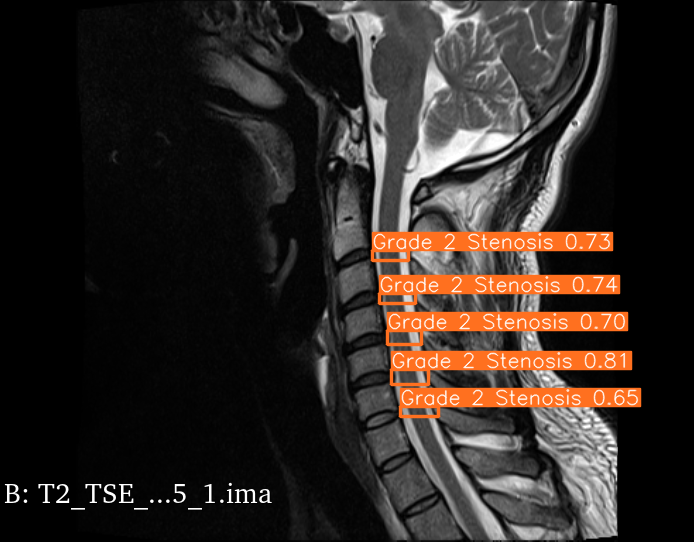

In [25]:
PREDS[19].show()

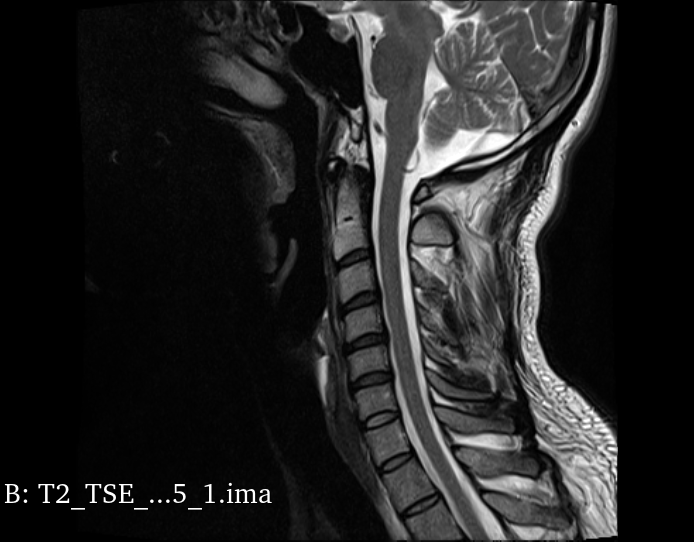

In [26]:
from PIL import Image

Image.fromarray(PREDS[19].orig_img)

In [27]:
b = PREDS[2]

In [28]:
b

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Grade 0 Stenosis', 1: 'Grade 1 Stenosis', 2: 'Grade 2 Stenosis', 3: 'Grade 3 Stenosis'}
obb: None
orig_img: array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0]

In [29]:
b.summary()

[{'name': 'Grade 3 Stenosis',
  'class': 3,
  'confidence': 0.89584,
  'box': {'x1': 396.52747, 'y1': 317.95468, 'x2': 425.78522, 'y2': 337.03271}},
 {'name': 'Grade 3 Stenosis',
  'class': 3,
  'confidence': 0.88542,
  'box': {'x1': 396.33224, 'y1': 285.29858, 'x2': 425.28528, 'y2': 303.23947}},
 {'name': 'Grade 3 Stenosis',
  'class': 3,
  'confidence': 0.88304,
  'box': {'x1': 397.26022, 'y1': 256.3902, 'x2': 426.95889, 'y2': 272.40216}},
 {'name': 'Grade 3 Stenosis',
  'class': 3,
  'confidence': 0.82076,
  'box': {'x1': 403.46274, 'y1': 350.98758, 'x2': 433.67758, 'y2': 364.89267}},
 {'name': 'Grade 3 Stenosis',
  'class': 3,
  'confidence': 0.58591,
  'box': {'x1': 399.47034, 'y1': 222.06702, 'x2': 429.86746, 'y2': 235.64977}}]